Name: gajjala sai charan reddy

Registration Number: 21BAI1521

Campus: Chennai

G-mail: gajjalasai.charanreddy2021@vitstudent.ac.in

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Task-1  Load the dataset.

In [26]:
inf=pd.read_csv('winequality-red.csv')
inf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
inf.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [28]:
inf.shape

(1599, 12)

In [29]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Task -2 Data Preprocessing and Visualization

Univariate Analysis

In [30]:
inf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
inf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Histogram

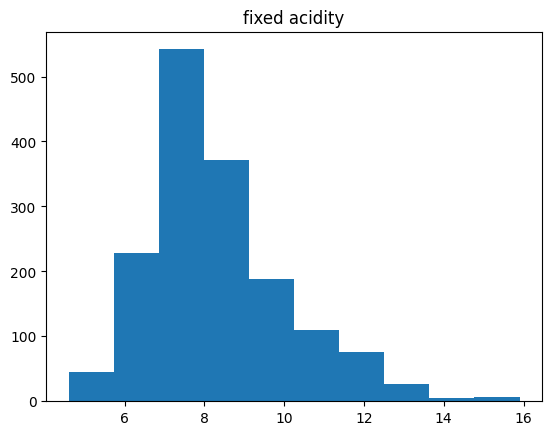

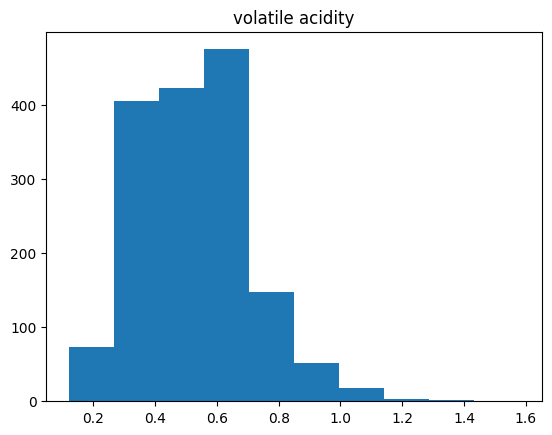

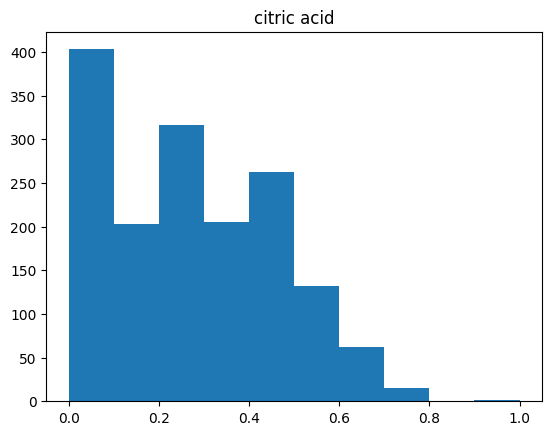

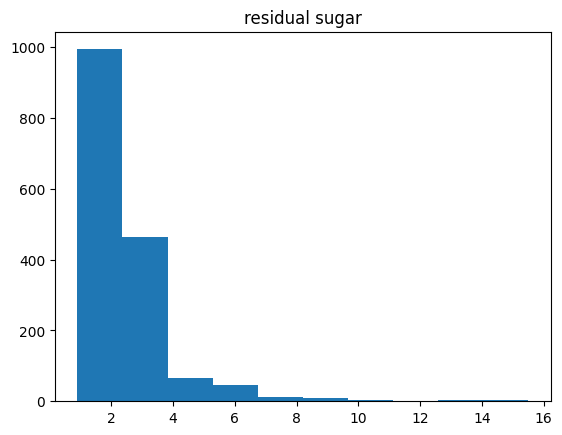

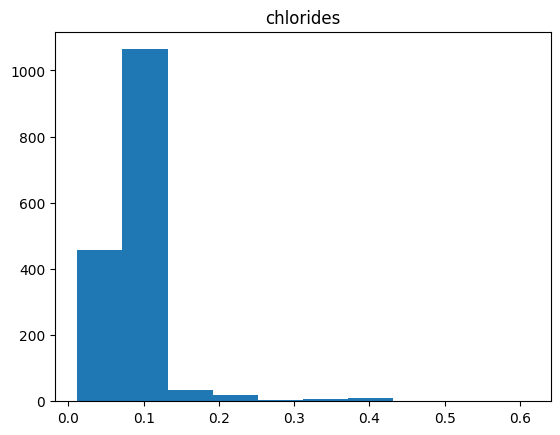

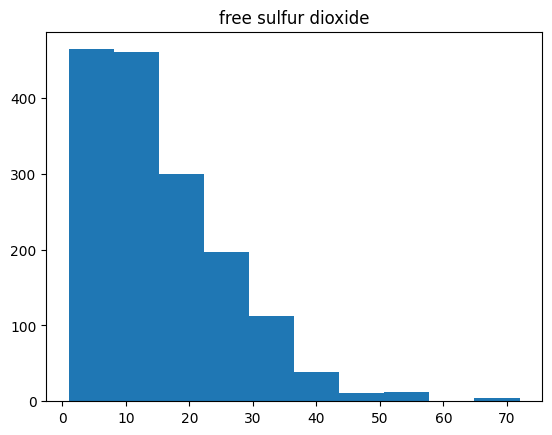

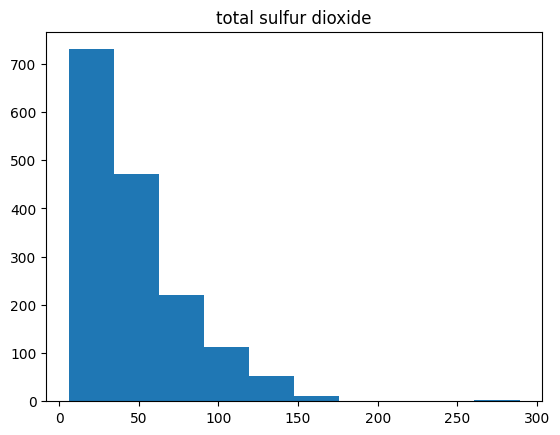

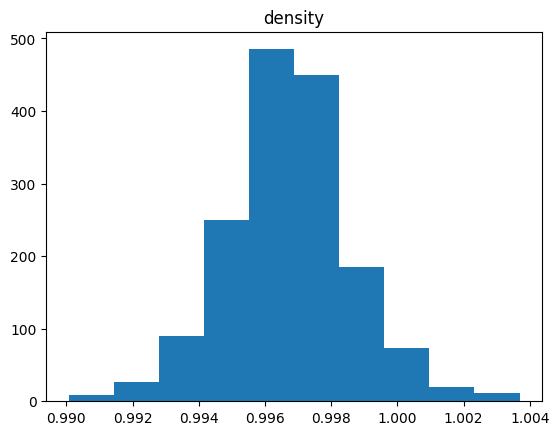

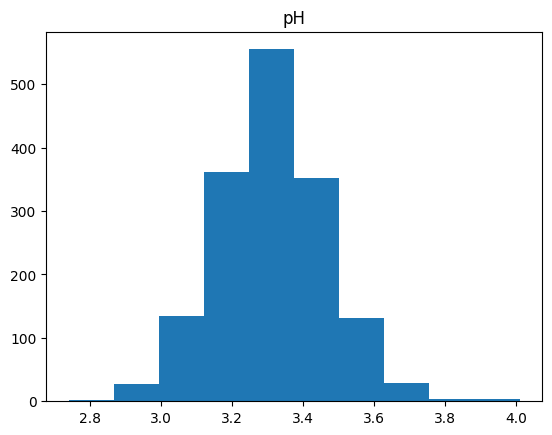

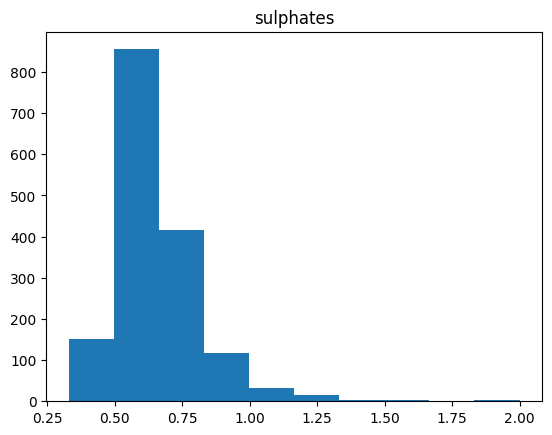

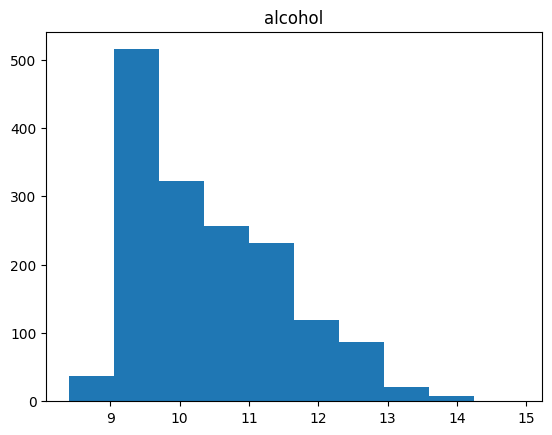

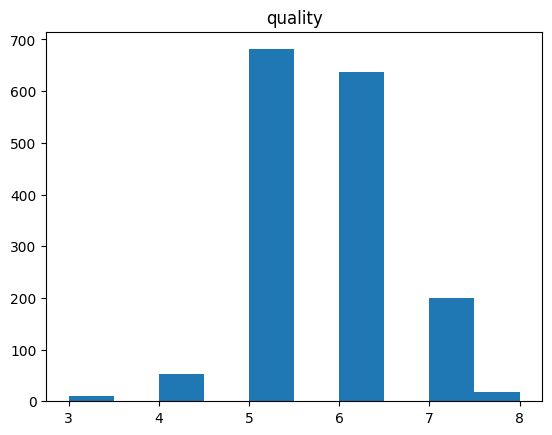

In [32]:
for i in inf.columns:
    plt.hist(inf[i])
    plt.title(i)
    plt.show()

Distribution Plot

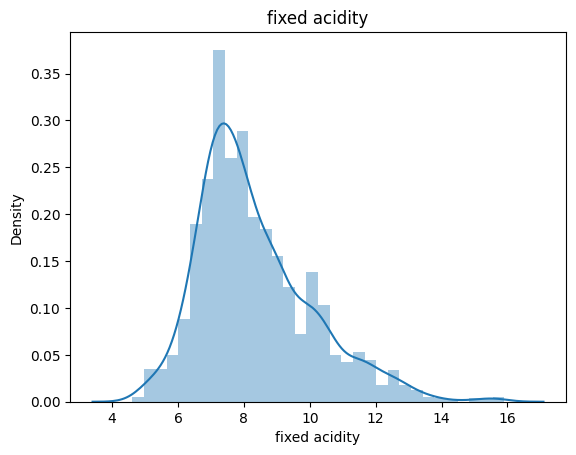

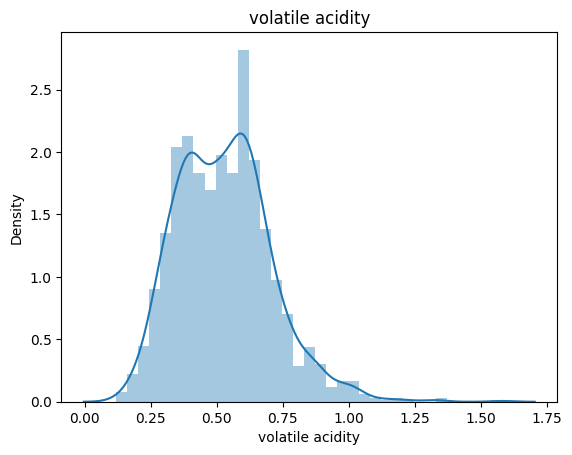

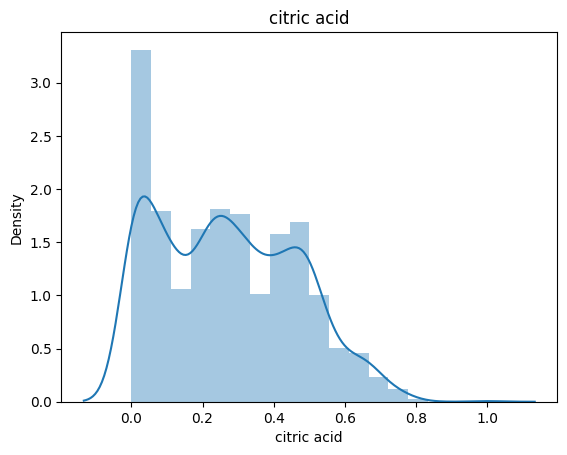

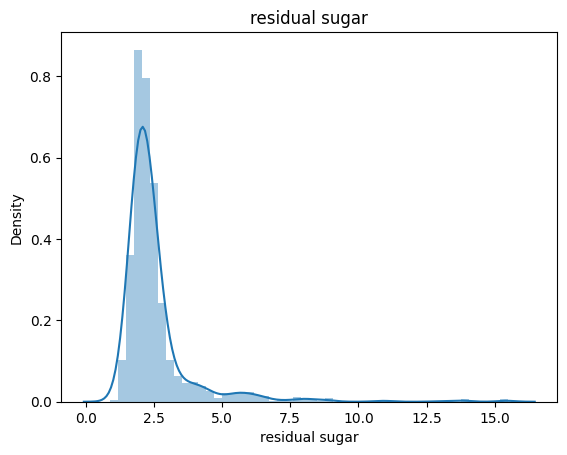

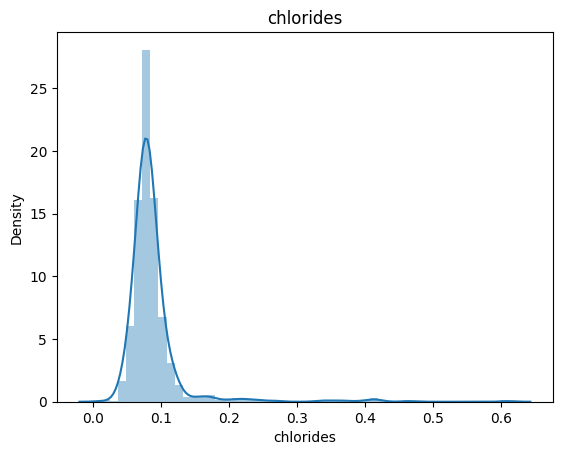

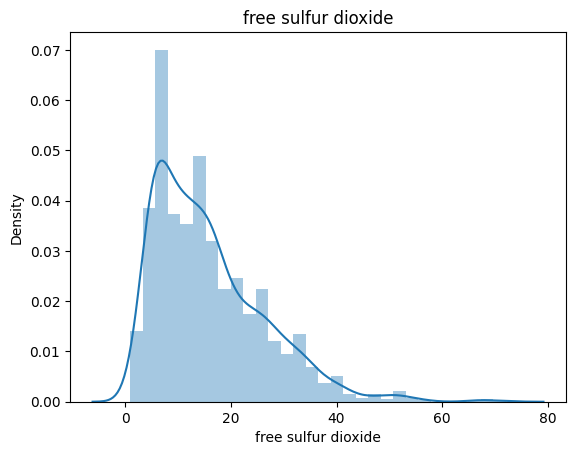

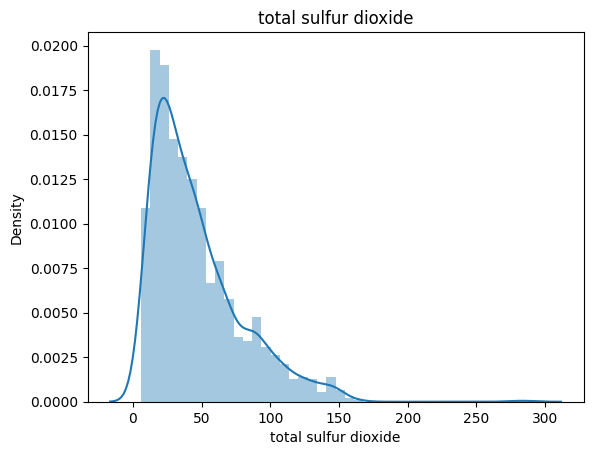

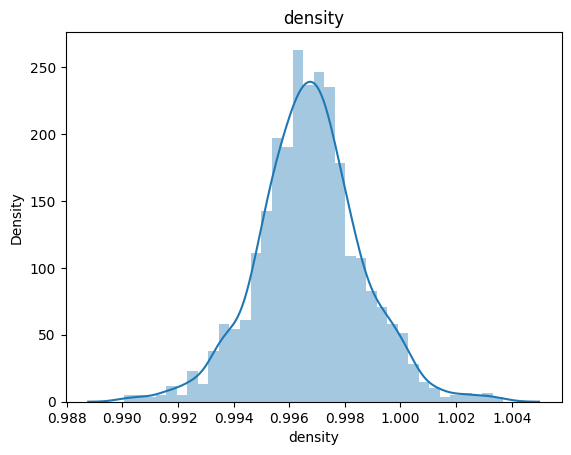

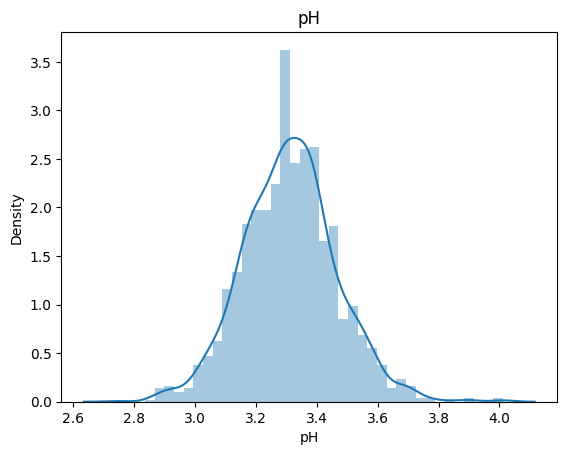

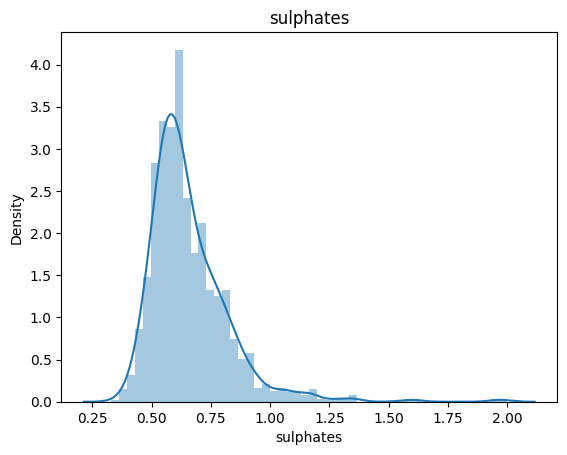

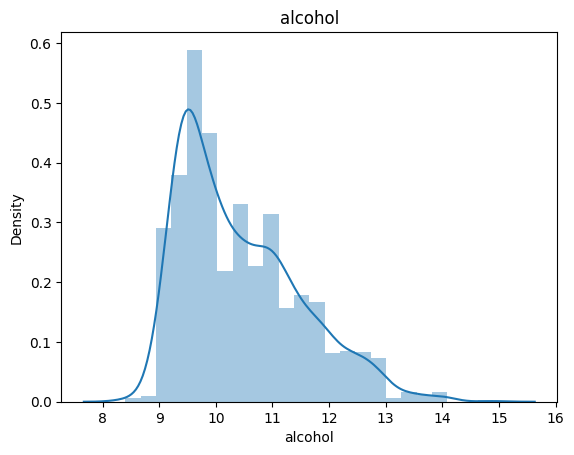

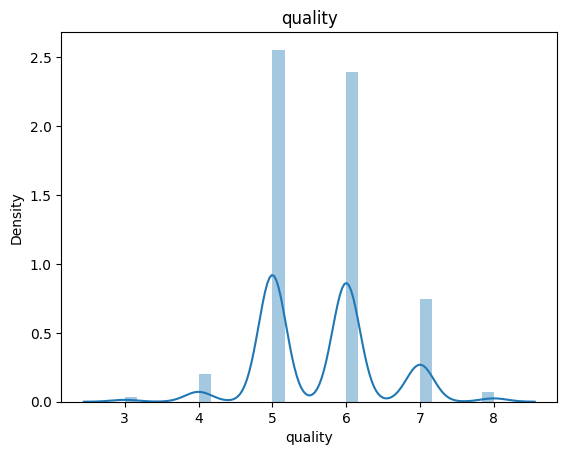

In [33]:
for i in inf.columns:
    sns.distplot(inf[i])
    plt.title(i)
    plt.show()

Box Plot

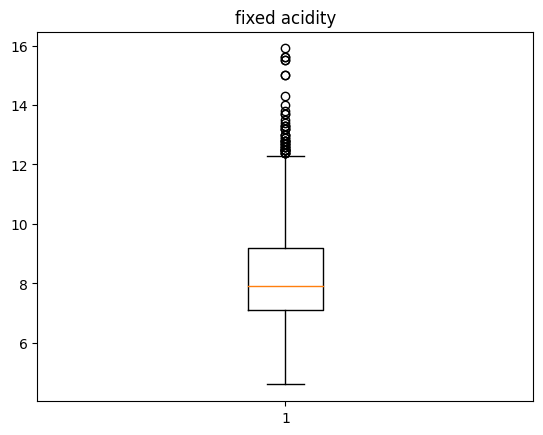

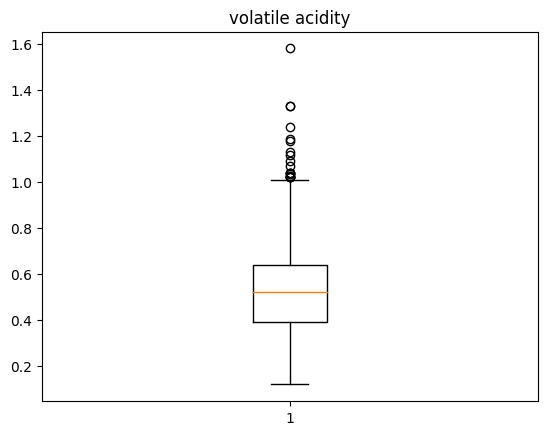

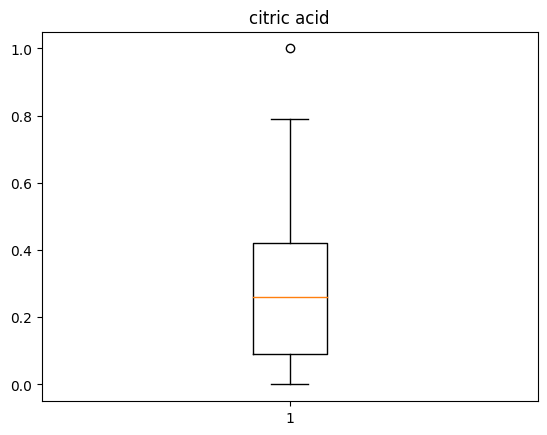

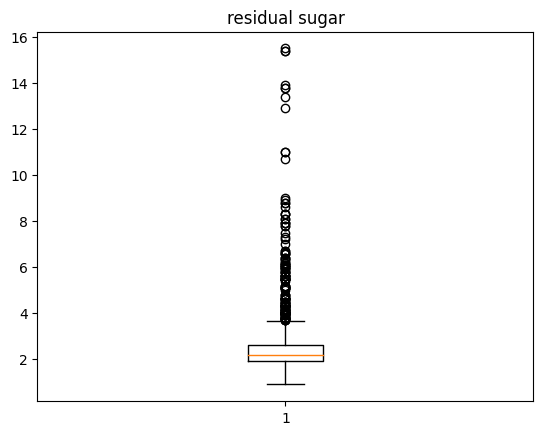

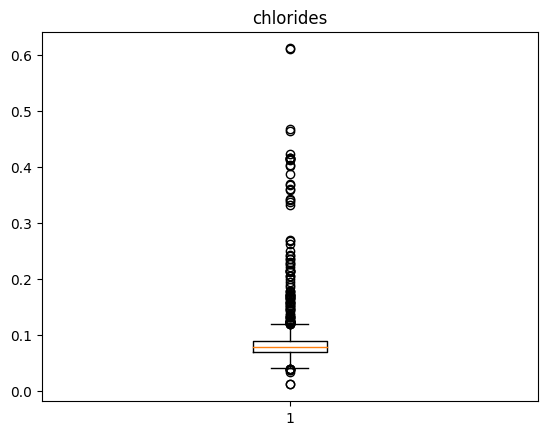

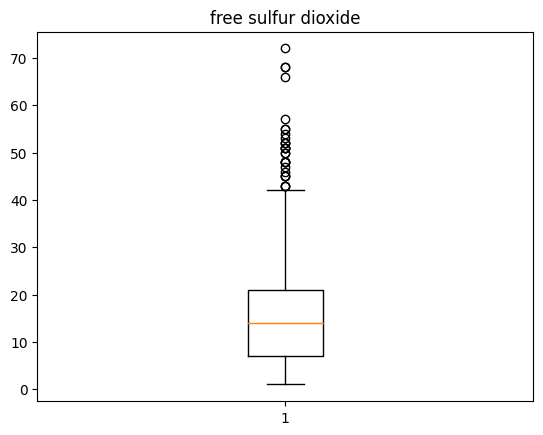

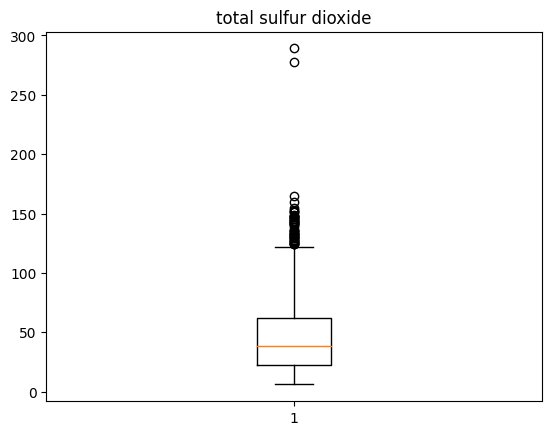

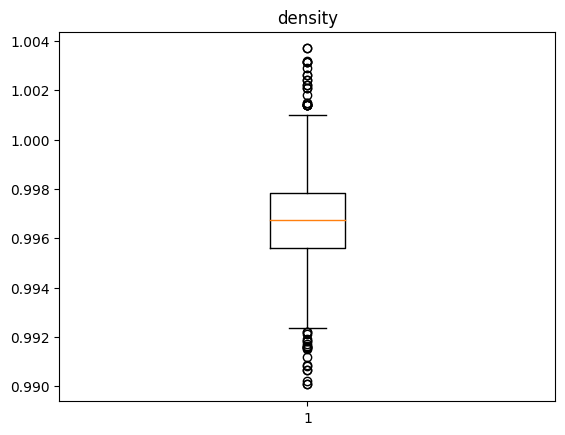

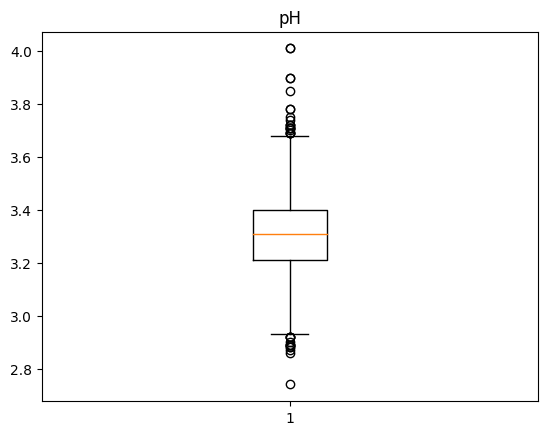

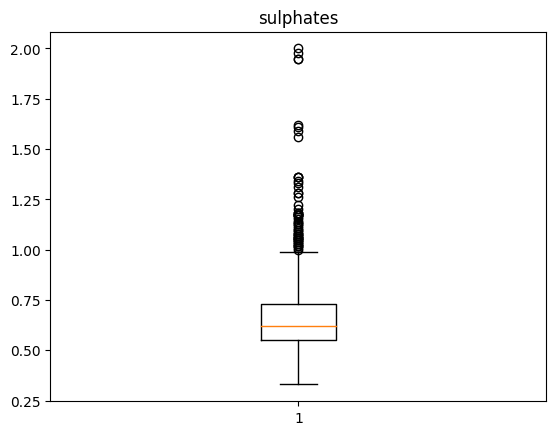

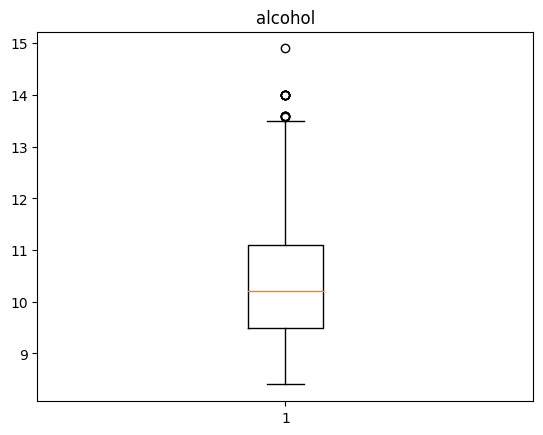

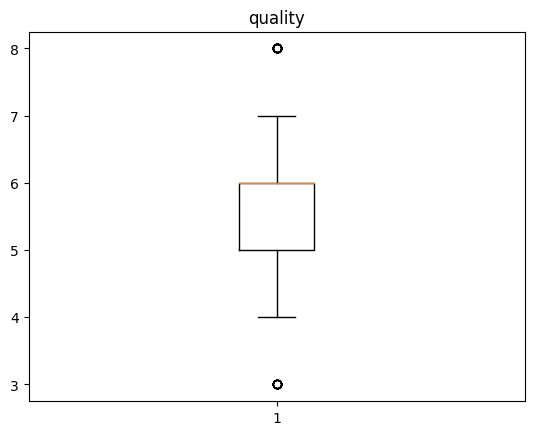

In [34]:
for i in inf.columns:
  plt.boxplot(inf[i])
  plt.title(i)
  plt.show()

Bi Variate Analysis

Sactter Plot

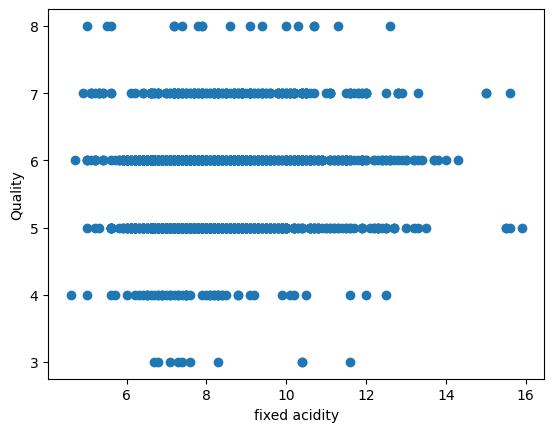

In [ ]:
for i in inf.columns:
  plt.scatter(inf[i],inf['quality'])
  plt.xlabel(i)
  plt.ylabel("Quality")
  plt.show()


Multivariate Variate Analysis

Pair Plot

In [ ]:
sns.pairplot(inf)

Heat Map

In [ ]:
sns.heatmap(inf.corr(),annot=True)

In [ ]:
inf.quality.value_counts()

In [ ]:
# Assuming a wine with quality > 6.5 is 'good' [1] & others are 'ordinary' [0]
inf['quality'] = inf.quality.apply(lambda x : 1 if x > 6.5 else 0)

Task-3 Building the Model

In [ ]:
X = inf.drop(columns = ['quality'])
y = inf.quality

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_scaled,y ,random_state=42,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

Task-4 Evaluate the model

In [ ]:
import sklearn.metrics as metrics

y_pred = model.predict(X_test)
print("Classification Report",metrics.classification_report(y_test, y_pred))
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall score:",metrics.recall_score(y_test, y_pred, average = 'macro'))

Task-5 Test with random observation

In [ ]:
X_scaled.head()

In [ ]:
print("Prediction:",model.predict([[0.283186,0.520548,0.56,0.068493,0.143573,0.098940,0.567548,0.409449,0.137725,0.191617,0.215385]]))

In [ ]:
print("Prediction:",model.predict([[0.380531,0.109589,0.45,0.054795,0.091820,0.084507,0.021201,0.254772,0.401575,0.131737,0.600000]]))